In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
paths = [f'dump_216_40/{i}.xyz' for i in np.arange(200, 20000, 200)]
number_of_particles = int(open(paths[0]).readline())
box_size = float(open(paths[0]).readlines()[1].split()[1])

xyz = [pd.DataFrame([line.split()
                     for line in open(path).readlines()[2:]]).drop(labels=[3, 4, 5], axis=1)
                     for path in paths]
for df in xyz: df.columns = ['x', 'y', 'z']

In [3]:
def calculate_distance(p1: np.array, p2: np.array, box_size: float):
    dist = p2 - p1
    for i in range(dist.shape[0]):
        if (dist[i] > box_size/2):
            dist[i] -= box_size
        elif (dist[i] < -box_size/2):
            dist[i] += box_size
    return np.linalg.norm(dist)


rdf = np.array([[[calculate_distance(df.iloc[i].to_numpy().astype(float), df.iloc[k].to_numpy().astype(float), box_size)
                  for i in range(number_of_particles) if i!=k]
                  for k in range(number_of_particles)]
                  for df in xyz])

/tmp/ipykernel_3920889/3107003121.py:17: RuntimeWarning: invalid value encountered in scalar divide
  hist_rdf = [hist_mean[i] / (4 * np.pi * bins[i]**2 * dr * rho) for i in range(hist_mean.shape[0])]


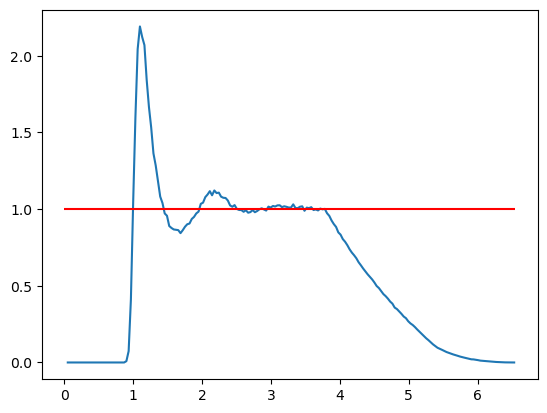

In [4]:
bins = 200

hist = []
max = ((box_size / 2)**2 * 3)**0.5
rho = number_of_particles / box_size**3

for k in range(rdf.shape[0]):
    for i in range(rdf.shape[1]):
        hist.append(np.histogram(rdf[k, i], bins=bins, range=[0, max])[0])

hist = np.array(hist)
bins = np.histogram(rdf[0, 0], bins=bins, range=[0, max])[1]
r = [(bins[i] + bins[i+1]) / 2 for i in range(bins.shape[0]-1)]
dr = bins[1] - bins[0]

hist_mean = np.mean(hist, axis=0)
hist_rdf = [hist_mean[i] / (4 * np.pi * bins[i]**2 * dr * rho) for i in range(hist_mean.shape[0])]

plt.plot(r, hist_rdf)
plt.hlines(1, 0, max, 'r')